## Исследование данных о российском кинопрокате



### Описание данных
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
<br>`title` - название фильма;
<br>`puNumber` — номер прокатного удостоверения;
<br>`show_start_date` — дата премьеры фильма;
<br>`type` — тип фильма;
<br>`film_studio` — студия-производитель;
<br>`production_country` — страна-производитель;
<br>`director` — режиссёр;
<br>`producer` — продюсер;
<br>`age_restriction` — возрастная категория;
<br>`refundable_support` — объём возвратных средств государственной поддержки;
<br>`nonrefundable_support` — объём невозвратных средств государственной поддержки;
<br>`financing_source` — источник государственного финансирования;
<br>`budget` — общий бюджет фильма;
<br>`ratings` — рейтинг фильма на КиноПоиске;
<br>`genres` — жанр фильма.
<br>Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 
<br>
<br>Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
<br>`puNumber` — номер прокатного удостоверения;
<br>`box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем библиотеки, посмотрим на таблицы, посмотрим типы данных столбцов, найдем столбец по которому будем объединять дата фреймы.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
print(data_movies.info())
data_movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
print(data_shows.info())
data_shows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


Мы определили общий столбец, по которому необходимо объединить датафреймы это *Номер прокатного удостоверения* ```puNumber``` .
<br> В датафрейме ```data_movies``` тип данных столбца ```object ``` , а в датафрейме```data_shows``` тип данных столбца ```int64  ```. Для объединения нам необходимо исправить тип данных столбцов в единый для обоих датафреймов. Преобразовать его в ```int64  ``` нам не удалось в связи с тем, что в датафрейме ```data_movies``` в столбце есть значение `"нет"`. Преобразуем тип данных в ```object ```.


In [7]:
data_shows['puNumber'] = data_shows['puNumber'].astype('str')

Теперь можем объединить два датафрейма.

In [8]:
df = pd.merge(data_movies, data_shows, on='puNumber',how='outer')

Посмотрим на результат.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_


#### Промежуточный итог:
> В данном шаге мы открыли и прочитали таблицы, объединили в единый датафрейм, предварительно изменив тип данных у общего столбца. 



### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Переведем show_start_date в тип datetime

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Рейтинг явно не может быть текстовым значением, посмотрим уникальные значения.

In [12]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [13]:
unknown_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']
df.query('ratings in @unknown_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,3.796000e+04
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,1.828825e+05
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,2.266408e+06
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер",NaN
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,88%,"фантастика,боевик,триллер",NaN


Мы видим техническую ошибку, вероятно рейтинг фильма не 99%, а 9.9. Но мы знаем, что самый рейтинговый фильм на КиноПоиске имеет оценку 9.1. Пока заполним эти аномальные рейтинги пропусками.

In [14]:
df['corrected_ratings'] = df['ratings']
df.loc[df['corrected_ratings'].isin(unknown_ratings), 'corrected_ratings'] = np.nan
df['corrected_ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [15]:
df['corrected_ratings'] = pd.to_numeric(df['corrected_ratings'])
df['ratings'] = df['corrected_ratings']
del df['corrected_ratings']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Изучим количество пропусков в каждом столбце.

In [17]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Первое, что бросается в глаза это большое количество пропусков в столбцах:

<br>Пропущена большая часть данных в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;

In [18]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Источника финансирования всего 3. Заполним пропуски значением `"unknown"`

In [19]:
df['financing_source'].fillna('unknown', inplace=True)

По аналогии со столбцом `financing_source` — источник государственного финансирования. Заполним пропуски в столбце `genres` — жанр фильма на значение `"ungenre"`.



In [20]:
df.fillna({'genres': 'ungenre'}, inplace=True)

In [21]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   996
genres                      0
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Посчитаем дубликаты Датафрейма.

In [22]:
df.duplicated(subset= ['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'], keep= False).sum()

875

Удалим выявленные дубликаты.

In [23]:
df = df.drop_duplicates(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'])

Причины, которые могли повлиять на появление дублей:


1.  Ошибка человеческого фактора, если данные вносятся вручную;
2.  Сбой программного обеспечения, не корректная работы базы данных;
3.  Многопоточность, например если два или более потока одновременно пытаются записать данные в одно и то же место.
4.   Повторное использование данных: данные могут быть повторно использованы в разных контекстах, что может привести к дублированию данных.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Для изучения категориальных значений посмотрим на уникальные значения категориальных столбцов.

In [24]:
df['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [25]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим пробелы перед строкой.

In [26]:
df['type'] = df['type'].str.strip()

In [27]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [28]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [29]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [30]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [31]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'ungenre', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

Почти во всех колонках встречались дефекты, главным образом, что находилось наиболее часто - излишние знаки пробела. Так в столбце `type` было удалено два повторяющихся, однако внесенных в данные ошибочных, значений. Также можно выделить, что несколько значений в одной ячейке затрудняют категоризацию данных. 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

К количественным значения относятся 4 столбца, это:
1.   `refundable_support` — объём возвратных средств государственной поддержки;
2.   `nonrefundable_support` — объём невозвратных средств государственной поддержки;
3.   `budget` — общий бюджет фильма;
4.   `box_office` — сборы в рублях.
<br> По определению бюджет фильма это – это суммарные затраты студии или производственной компании на фильм. Некоторые кинокартины финансируются Минкультом РФ, часть из них возвратные средства, часть невозвратные. Соответсвенно бюджет фильма состоит из собственных средств, средств инвесторов и спонсоров (при наличии) и гос. финансовой поддержки от Минкульта РФ. Сгруппируем их и посмотрим описание.



In [32]:
groups = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office',]

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[groups].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,3158.00
mean,11864457.83,48980988.89,127229716.68,76478696.16
std,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00,86239.00
50%,0.00,30000000.00,68649916.00,2327987.55
75%,15000000.00,40375000.00,141985319.50,23979671.02
max,180000000.00,400000000.00,2305074303.00,3073568690.79


Есть фильмы с нулевым бюджетом, посмотрим такие значения

In [34]:
df[df['budget'] == 0].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,16.00,17.00
mean,16705882.35,65174674.41,0.00,5.72,163137294.43
std,20064784.78,61236204.09,0.00,0.92,251115991.43
min,0.00,0.00,0.00,4.30,1334699.40
25%,0.00,23000000.00,0.00,5.07,50451949.00
50%,10000000.00,51000000.00,0.00,5.70,72937783.20
75%,20000000.00,75000000.00,0.00,6.30,184487551.40
max,60000000.00,250000000.00,0.00,7.80,1038321489.00


Если у фильмов нет бюджета, то все равно можно найти такие, которые получили какую-то господдержку. В таких случаях бюджет не может быть меньше, чем сумма полученной поддержки. Можно проверить кинокартины, у которых бюджет меньше полученной поддержки, включая возвратные и невозвратные средства.

In [35]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


Такие картины есть. Исправим в них бюджет на сумму поддержки, используя функцию.

In [36]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [37]:
df['budget_corrected'] = df.apply(correct_budget, axis=1)
df.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,budget_corrected
count,332.00,332.00,332.00,6011.00,3158.00,332.00
mean,11864457.83,48980988.89,127229716.68,6.46,76478696.16,131422395.80
std,24916555.26,59980117.92,188588333.12,1.11,240353122.82,187148242.67
min,0.00,0.00,0.00,1.00,0.00,6000000.00
25%,0.00,25000000.00,42000000.00,5.80,86239.00,45524799.50
50%,0.00,30000000.00,68649916.00,6.60,2327987.55,71196901.50
75%,15000000.00,40375000.00,141985319.50,7.20,23979671.02,150000000.00
max,180000000.00,400000000.00,2305074303.00,9.20,3073568690.79,2305074303.00


теперь посмотрим, есть ли еще такие строки

In [38]:
len(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget_corrected']])

0

In [39]:
df['budget'] = df['budget_corrected']
del df['budget_corrected']

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [40]:
df['movie_start_year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,movie_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,7.70,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,8.30,"мелодрама,комедия",2700.00,2013


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [41]:
df['director_first'] = df['director'].str.split(",").str[0]
df['genre_first'] = df['genres'].str.split(",").str[0]
df['director_first'] = df['director_first'].str.strip()
df['genre_first'] = df['genre_first'].str.strip()

In [42]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,movie_start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
df['support_part_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,movie_start_year,support_part_budget
count,332.00,332.00,332.00,6011.00,3158.00,7002.00,332.00
mean,11864457.83,48980988.89,131422395.80,6.46,76478696.16,2014.81,0.54
std,24916555.26,59980117.92,187148242.67,1.11,240353122.82,2.96,0.20
min,0.00,0.00,6000000.00,1.00,0.00,2010.00,0.04
25%,0.00,25000000.00,45524799.50,5.80,86239.00,2012.00,0.38
50%,0.00,30000000.00,71196901.50,6.60,2327987.55,2015.00,0.61
75%,15000000.00,40375000.00,150000000.00,7.20,23979671.02,2018.00,0.66
max,180000000.00,400000000.00,2305074303.00,9.20,3073568690.79,2019.00,1.00


### Промежуточный итог:


> На этом шаге мы:
1.   Проверили типы данных;
2.   Исправили значения в столбце "Рейтинг";
3.   Заполнили пропуски там, где это возможно, в столбцах "Источник финансировния" и "Жанр"; 
4.   Удалили выявленные дубликаты, описали причины их появления;
5.   Изучили категориальные и количественные данные, убрали пробелы в столбце "Тип фильма", исправили сумму бюджета фильма, где это было необходимо;
6.   Выделили год из даты премьеры и добавили в новый столбец;
7.   Выделили первого в списке режиссера и жанр, также значения добавили в новые столбцы;
8.   Посчитали долю государственной поддержки по отношению к бюджету.






### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Из описания мы знаем, что те картины, где указаны сборы в рублях, были показаны в кинотеатре.

In [44]:
df.groupby('movie_start_year')['box_office'].count().sum()

3158

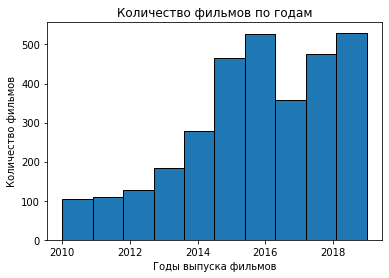

   movie_start_year  box_office
0              2010         105
1              2011         109
2              2012         128
3              2013         184
4              2014         279
5              2015         465
6              2016         526
7              2017         357
8              2018         475
9              2019         530


In [45]:
cinema_year = df.pivot_table(index='movie_start_year', values='box_office', aggfunc='count').reset_index()
counts = cinema_year['box_office']
plt.hist(cinema_year['movie_start_year'], weights=counts, edgecolor='black')

plt.title('Количество фильмов по годам')
plt.xlabel('Годы выпуска фильмов')
plt.ylabel('Количество фильмов')

plt.show()
print(cinema_year)

Посчитаем  какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах через лямбда функцию.

In [46]:
cinema_year_part = (df[['movie_start_year','box_office']].groupby(
    'movie_start_year'
    ).apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame(
    ).reset_index()
cinema_year_part

,movie_start_year,0
0,2010,13.16
1,2011,22.02
2,2012,23.93
3,2013,30.67
4,2014,36.90
5,2015,66.71
6,2016,65.59
7,2017,71.12
8,2018,53.55
9,2019,56.99


Соединим чтобы посмотреть общую картину.

In [47]:
final_cinema_year_part = cinema_year.merge(cinema_year_part,how='left', on='movie_start_year')
final_cinema_year_part.rename(columns={'box_office' : 'films_in_cinema_count', 0 : 'cinema_part'}, inplace=True)
final_cinema_year_part

,movie_start_year,films_in_cinema_count,cinema_part
0,2010,105,13.16
1,2011,109,22.02
2,2012,128,23.93
3,2013,184,30.67
4,2014,279,36.90
5,2015,465,66.71
6,2016,526,65.59
7,2017,357,71.12
8,2018,475,53.55
9,2019,530,56.99


Информация неоднородна. В данной выборке наименьшее количество фильмов, показанных в кинотеатре, приходится на период с 2010 по 2014 годы. Доля этих фильмов варьируется от 10 до 34 процентов. Следовательно, нельзя утверждать, что в указанный период было проведено меньше всего кинопоказов. Наибольшее количество кинопоказов в кинотеатрах приходится на 2019 год, однако доля этих фильмов в данной выборке не является наибольшей по сравнению с другими годами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [48]:
dynm_film_distrib = df.groupby('movie_start_year')['box_office'].agg('sum') / 1000000

In [49]:
dynm_film_distrib

movie_start_year
2010       2.43
2011      14.10
2012       6.96
2013      29.80
2014    7444.95
2015   39497.37
2016   47866.30
2017   48563.71
2018   49668.40
2019   48425.71
Name: box_office, dtype: float64

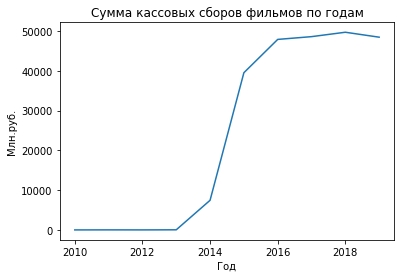

In [50]:
sns.lineplot(data=dynm_film_distrib)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Млн.руб.');
plt.show()

Если необходимо учитывать сумму сборов по годам, то максимум приходится на 2018 год. Года с 2010 по 2014 в расчет не берем, так как по ним меньше всего данных, поэтому минимум приходится на 2015 год

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [51]:
mean_median_box_office = df.groupby('movie_start_year')['box_office'].agg(['mean', 'median'])

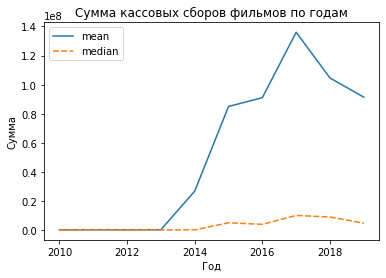

In [52]:
sns.lineplot(data=mean_median_box_office)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Сумма');
plt.show()

Заметно, что в случае сборов имеется значительный разброс данных, который проявляется в различии между медианой и средним значением. Это указывает на наличие в данных значений, которые сильно отличаются от остальных. Однако для киноиндустрии это не является необычным явлением. В среднем, наиболее прибыльный год с точки зрения кассовых сборов приходится на 2017 год, что подтверждается как медианным значением, так и средним.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [53]:
df.query('2015 <= movie_start_year <= 2019').groupby('age_restriction')['box_office'].sum().sort_values(ascending=False)

age_restriction
«16+» - для детей старше 16 лет          76034733643.63
«12+» - для детей старше 12 лет          60619446628.33
«6+» - для детей старше 6 лет            55798610799.68
«18+» - запрещено для детей              40759615572.12
«0+» - для любой зрительской аудитории     809077425.97
Name: box_office, dtype: float64

С 2015 по 2019 года больше всего денег в прокате собрали фильмы с возрастным ограничением "16+"

In [54]:
year_age_movie_box = df.query('2015 <= movie_start_year <= 2019').groupby(['movie_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()

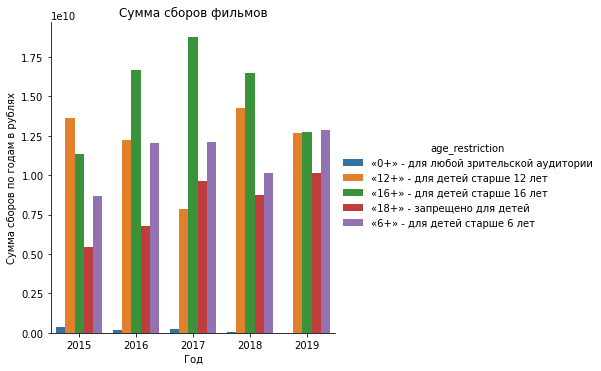

In [55]:
sns.catplot(x='movie_start_year', y='box_office', hue='age_restriction', data=year_age_movie_box, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

Исходя из графика мы видим что картина не меняется в зависимости от года, категория "16+" всегда в лидерах, за исключением 2019 года.Умеренный рост сборов у фильмов "18+" за исключением 2018 года. Сборы с каждым годом падают в категории "0+", вероятно связано с увеличением детского контента на видеохостингах.

#### Промежуточный итог:
> Исследовали данные и определили:
1.   За 10 лет в прокат выходило от 105 до 530 кинолент в год, в представленном Датафрейме не у всех фильмо есть данные о сборах в прокате, для каждого года разная доля фильмов с имеющимимся данным о сборах в кинопрокате и эта доля не пропорциональна годам выпуска;
2.   Самые кассовые фильмы вышли в 2018 году, стоит учесть что среднее и медианое значения сильно разнятся;
3.   Определили, что самые кассовые кинокартины с возрастной категорией "16+".



### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала выделим эти фильмы.

In [56]:
gov_support = df[df['budget'].isna() == False].copy()
gov_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,movie_start_year,director_first,genre_first,support_part_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,ungenre,28140.00,2014,А.Якимчук,ungenre,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.51
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.53
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65


На даннном этапе нас уже не интерсует возвратные денежный средства или нет, можем объединять 2 столбца и увидеть общую сумму государственной поддержки.

In [57]:
gov_support['total_support'] = gov_support['refundable_support'] + gov_support['nonrefundable_support']
gov_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,movie_start_year,director_first,genre_first,support_part_budget,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33,26500000.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,37142857.00,Министерство культуры,NaN,ungenre,28140.00,2014,А.Якимчук,ungenre,0.70,26000000.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61,107847945.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,28000000.00
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62,25000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,...,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.51,500000000.00
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,...,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.53,100000000.00
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,...,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53,500000000.00
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65,30000000.00


теперь добавим столбец ```profit``` с разностью между сборами и бюджетом.

In [58]:
gov_support['profit'] = gov_support['box_office'] - gov_support['budget']

In [59]:
gov_support.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,movie_start_year,support_part_budget,total_support,profit
count,332.00,332.00,332.00,314.00,318.00,332.00,332.00,332.00,318.00
mean,11864457.83,48980988.89,131422395.80,6.00,132432420.05,2016.72,0.54,60845446.72,425697.96
std,24916555.26,59980117.92,187148242.67,1.12,334837856.99,1.64,0.20,72755459.47,315910432.27
min,0.00,0.00,6000000.00,1.00,1550.00,2013.00,0.04,3000000.00,-1971477243.41
25%,0.00,25000000.00,45524799.50,5.30,1236675.50,2015.00,0.38,25333750.00,-70694429.75
50%,0.00,30000000.00,71196901.50,6.20,15720067.71,2017.00,0.61,35000000.00,-40680816.25
75%,15000000.00,40375000.00,150000000.00,6.70,106373008.27,2018.00,0.66,60000000.00,-2362182.18
max,180000000.00,400000000.00,2305074303.00,8.50,3073568690.79,2019.00,1.00,500000000.00,2913568690.79


в среднем доля гос.поддержки фильма 54%. Более половины бюджета фильма это  деньги, которые выделило Министерство Культуры РФ. 75% фильмов с гос.поддержкой убыточные, самый худший показатель это почти 2 млрд. рублей убытков, половина фильмов с гос.поддержкой в убытке, но в тоже время в среднем фильмы с прибылью 425 тысяч рублей. Такой огромный разброс говорит о том, что в данных есть кинохиты, которые бьют рекорды по сборам.

Посмотрим на годы кинопроката фильмов с гос.поддержкой.

In [60]:
gov_support.groupby('movie_start_year')['total_support'].count()

movie_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

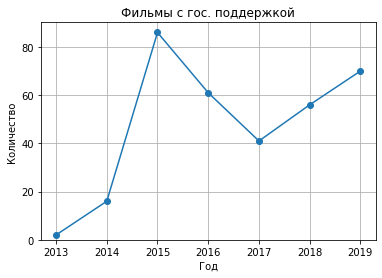

In [61]:
gov_support.groupby('movie_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Фильмы с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

2015 год был самым активным на гос.поддержку кино. Мало данных по 2013 и 2014, эти года не будем учитывать. 

In [62]:
gov_support = gov_support[gov_support['movie_start_year'] > 2014]

Посмотрим сколько вообще выделялось денег за каждый год.

In [63]:
gov_support.groupby('movie_start_year')['total_support'].sum()

movie_start_year
2015   3656241459.00
2016   4303155482.00
2017   3183971662.00
2018   3446969465.00
2019   4904000000.00
Name: total_support, dtype: float64

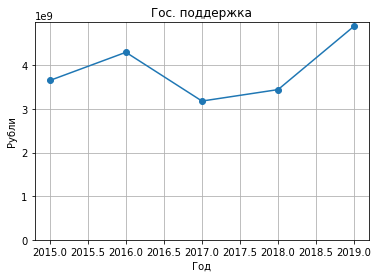

In [64]:
gov_support.groupby('movie_start_year')['total_support'].agg(
    'sum').plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

За 2019 год Министерством Культуры выделено 4,9 млрд. рублей.

Взглянем на рейтинг фильмов.

count   297.00
mean      6.00
std       1.13
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       8.50
Name: ratings, dtype: float64


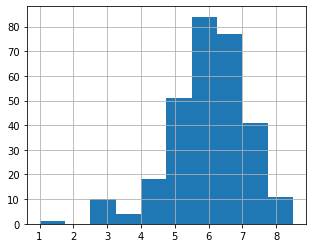

In [65]:
gov_support['ratings'].hist(figsize=(5,4))
print(gov_support['ratings'].describe())

Фильмы с гос.поддержкой получают относительно не плохой средний бал в рейтинге Кинопоиска. Посмотрим зависит ли государственная поддержка от рейтинга фильма.

Text(0.5, 1.0, 'Корреляция: 0.12')

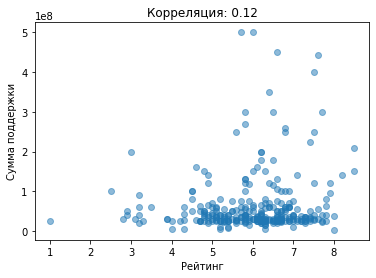

In [66]:
corr_coef = gov_support['ratings'].corr(gov_support['total_support'])

x = gov_support['ratings'] 
y = gov_support['total_support']

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма поддержки')

plt.title(f'Корреляция: {corr_coef:.2f}')

Сумма поддержки Министерством культуры почти не зависит от рейтинга фильма на Кинопоиске. Посмотрим самые популярные жанры, на которые Минкульт выделяет деньги.

In [67]:
pivot = pd.pivot_table(gov_support, values='title', index='genres', aggfunc='count')
pivot = pivot.sort_values(by='title', ascending=False)
print(pivot.head(10))

                                title
genres                               
драма                              42
комедия                            31
комедия,мелодрама                  16
ungenre                            15
драма,мелодрама                     6
мультфильм,комедия,приключения      5
военный,драма,история               5
ужасы                               4
мультфильм                          4
драма,военный,история               4


Посмотрим сколько денег получили топ 3. Для этого исправим немного сводную таблицу.

In [68]:
pivot = pd.pivot_table(gov_support, values=['title', 'total_support'], index='genre_first', aggfunc={'title': 'count', 'total_support': 'sum'})
pivot = pivot.sort_values(by='title', ascending=False)
print(pivot.head(3))

             title  total_support
genre_first                      
драма           85  5018904333.00
комедия         71  3052435000.00
мультфильм      30  2391520000.00


Больше всего Минкульт выделил за 2015-2019 года на драмы - более 5 млрд.руб. На 2 млрд меньше на комедии. С жанрами разобрались. Посмотрим, на топ-10 режиссеров фильмов с государственной поддержкой.

In [69]:
top_director = pd.pivot_table(gov_support, 
                              values=['total_support', 'profit', 'ratings'], 
                              index='director_first', 
                              aggfunc=['count', 'sum', 'mean', 'median'])
top_director.columns = ['_'.join(col).strip() for col in top_director.columns.values]
top_director.sort_values(by='sum_total_support', ascending=False).head(10)

,count_profit,count_ratings,count_total_support,sum_profit,sum_ratings,sum_total_support,mean_profit,mean_ratings,mean_total_support,median_profit,median_ratings,median_total_support
director_first,,,,,,,,,,,,
Ф.Бондарчук,1,2,2,788321489.00,11.30,750000000.00,788321489.00,5.65,375000000.00,788321489.00,5.65,375000000.00
Н.Хомерики,3,3,3,-325561715.77,18.10,660000000.00,-108520571.92,6.03,220000000.00,-92930337.20,5.80,300000000.00
А.Кравчук,1,1,1,-262296814.47,6.00,500000000.00,-262296814.47,6.00,500000000.00,-262296814.47,6.00,500000000.00
А.Мизгирев,1,1,1,-319915396.40,6.60,450000000.00,-319915396.40,6.60,450000000.00,-319915396.40,6.60,450000000.00
Н.Лебедев,1,1,1,766971523.00,7.60,442104482.00,766971523.00,7.60,442104482.00,766971523.00,7.60,442104482.00
А.Мегердичев,1,1,1,2189493953.00,7.50,400000000.00,2189493953.00,7.50,400000000.00,2189493953.00,7.50,400000000.00
Р.Давлетьяров,4,4,4,-315100846.06,28.60,352000000.00,-78775211.52,7.15,88000000.00,-100033476.03,7.10,86000000.00
Д.Дьяченко,4,4,4,1624203322.12,22.60,351000000.00,406050830.53,5.65,87750000.00,154837534.75,5.45,83000000.00
И.Шурховецкий,1,1,1,90392336.00,6.40,350000000.00,90392336.00,6.40,350000000.00,90392336.00,6.40,350000000.00


Федор Бондарчук является наиболее поддерживаемым режиссером, который получил государственную помощь для съемки двух фильмов. Из двух фильмов, снятых при помощи государственной поддержки, только "Притяжение" имеет данные о доходах в размере 788 млн рублей, несмотря на то, что его рейтинг немного ниже 6 баллов.
<br>
Второй по величине государственной поддержки является Николай Хомерики, однако его фильмы не окупаются и не приносят прибыли, хотя в среднем рейтинг его фильмов выше, чем у фильмов Бондарчука.
<br>
Среди всех режиссеров, получивших государственную поддержку, есть один особенный претендент - Николай Лебедев. Его фильм "Экипаж" не только принес доход, но также получил хорошие отзывы критиков и зрителей, с оценкой в 7,6 баллов. Попробуем отсортировать список режиссеров по убыванию доходности их фильмов.

In [70]:
top_director.sort_values(by='sum_profit', ascending=False).head(10)

,count_profit,count_ratings,count_total_support,sum_profit,sum_ratings,sum_total_support,mean_profit,mean_ratings,mean_total_support,median_profit,median_ratings,median_total_support
director_first,,,,,,,,,,,,
К.Шипенко,2,2,2,3172514510.79,14.20,285000000.00,1586257255.39,7.10,142500000.00,1586257255.39,7.10,142500000.00
А.Мегердичев,1,1,1,2189493953.00,7.50,400000000.00,2189493953.00,7.50,400000000.00,2189493953.00,7.50,400000000.00
А.Сидоров,1,1,1,1707969287.52,6.50,180000000.00,1707969287.52,6.50,180000000.00,1707969287.52,6.50,180000000.00
Д.Дьяченко,4,4,4,1624203322.12,22.60,351000000.00,406050830.53,5.65,87750000.00,154837534.75,5.45,83000000.00
О.Трофим,1,0,1,1297146575.89,0.00,85000000.00,1297146575.89,NaN,85000000.00,1297146575.89,NaN,85000000.00
Ф.Бондарчук,1,2,2,788321489.00,11.30,750000000.00,788321489.00,5.65,375000000.00,788321489.00,5.65,375000000.00
Н.Лебедев,1,1,1,766971523.00,7.60,442104482.00,766971523.00,7.60,442104482.00,766971523.00,7.60,442104482.00
Д.Шмидт,3,3,3,698312261.00,18.60,215000000.00,232770753.67,6.20,71666666.67,311069235.00,6.20,75000000.00
Д.Киселев,2,2,2,696959413.00,13.30,350000000.00,348479706.50,6.65,175000000.00,348479706.50,6.65,175000000.00


Клим Шипенко занимает первое место благодаря успеху его кинокартин "Салют-7" и "Холоп". Они имеют высокие оценки - 7.4 и 6.8 соответственно, и заработали больше всего денег. Бекмамбетов попал в ТОП-10 на последней строчке благодаря прибыльности своих фильмов "Ёлки", несмотря на не самые высокие оценки. Время подвести итог.

#### Промежуточные итог:
> Проведя исселдование можем сообщить следующее:
1.   54% бюджета фильма с государственной поддержкой это средства Минкульта РФ;
2.   6 баллов - таков средний рейтинг кинолент с государственной поддержкой, и он не зависит от суммы государственной поддержки;
3.   2015 год самый продуктивный для фильмов с государственной поддержкой, но самый большая поддержка российскому кино от Министерства культуры была в 2019 году;
4.   Больше всего финансов от Министерства культуры получил режиссер Федор Бондарчук, но самые окупаемые фильмы снимал Клим Шипенко.





### Шаг 5. Напишите общий вывод

#### Общий вывод:
> В таблице имеются повторения названий фильмов, однако у них различные номера прокатных удостоверений, поэтому информация была оставлена без дополнительной обработки. Также некоторые фильмы имеют одинаковые номера прокатных удостоверений, но после проверки на официальном сайте было [подтверждено](https://opendata.mkrf.ru/opendata/7705851331-register_movies), что такие фильмы действительно существуют под одним номером. Возможно, что под одним номером может находиться несколько фильмов. 
<br>
<br>В строках с нулевыми значениями бюджета были заменены на сумму поддержки. Для дальнейшего анализа были добавлены дополнительные столбцы, включая год выпуска фильма, первого режиссера и первого жанра в списке, а также отношение суммы поддержки к бюджету. 
<br>
<br>Наибольшее количество фильмов было показано в кинотеатрах в 2019 году, немного меньше - в 2016 году. Минимальная сумма сборов была зафиксирована в 2015 году, а максимальная - в 2018 году. Фильмы с возрастным ограничением 16+ имеют наибольшие сборы. Если рассматривать по годам, то в 2017 году фильмы с возрастным ограничением 16+ принесли больше всего денег, но в 2015 году кино с возрастным ограничением 12+ оказалось более прибыльным. 
<br>
<br>Жанр "драма" занял первое место по количеству и сумме поддержки, а жанр "комедия" занял второе место. Федор Бондарчук получил самую большую сумму поддержки. 
<br>
<br> В таблице имелись ошибки: 
>* Лишние пробелы в категориальных переменных, которые были исправлены. 
>* Рейтинги в процентах для некоторых строк были приведены к NaN, поскольку такие значения были некорректны.